In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train_data = pd.read_csv('HousingData.csv')

### Data Exploration

In [2]:
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
train_data.isnull().sum()   #tells which columns have null values

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
train_data['CRIM'].fillna(train_data['CRIM'].median(),inplace=True)
train_data['ZN'].fillna(train_data['ZN'].median(),inplace=True)
train_data['INDUS'].fillna(train_data['INDUS'].mean(),inplace=True)
train_data['CHAS'].fillna(train_data['CHAS'].median(),inplace=True)
train_data['AGE'].fillna(train_data['AGE'].median(),inplace=True)
train_data['LSTAT'].fillna(train_data['LSTAT'].median(),inplace=True)

/var/folders/p9/f_8_qhzx0jxd3dxqj3sdqthh0000gn/T/ipykernel_7495/1090732820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['CRIM'].fillna(train_data['CRIM'].median(),inplace=True)
/var/folders/p9/f_8_qhzx0jxd3dxqj3sdqthh0000gn/T/ipykernel_7495/1090732820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [6]:
train_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.083992,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.664625,22.532806
std,8.570832,23.025124,6.699165,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.017219,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.900000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
y = train_data['MEDV']  #seperating features and labels
X_features = train_data.drop('MEDV',axis=1)

### Implementing Linear Regression using normal equation

In [8]:
def scale(X):   #using z-score normalization
    mu = np.mean(X)
    sigma = np.std(X)
    X_scaled = (X-mu)/sigma
    return X_scaled

In [9]:
X_scaled = scale(X_features)

/Users/idant/Developer/Cryptonite-RTP-Idant/.cryptonite/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [10]:
m = X_scaled.shape[0]   #add bias
ones_column = np.ones((m,1))
X_b = np.concatenate((ones_column,X_scaled),axis=1)

In [11]:
X_b    #returns an array

array([[  1.        ,  -8.17871258,  -2.2621761 , ..., -25.30759149,
          3.58386072,  -9.27999701],
       [  1.        ,  -8.17626115,  -3.04470448, ..., -24.15168526,
          3.58386072,  -8.68658289],
       [  1.        ,  -8.17626349,  -3.04470448, ..., -24.15168526,
          3.53923578,  -9.41551226],
       ...,
       [  1.        ,  -8.17235452,  -3.04470448, ..., -22.67212529,
          3.58386072,  -9.18584958],
       [  1.        ,  -8.16665165,  -3.04470448, ..., -22.67212529,
          3.54603368,  -9.06602557],
       [  1.        ,  -8.17391367,  -3.04470448, ..., -22.67212529,
          3.58386072,  -8.8663189 ]], shape=(506, 14))

In [12]:
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  #finding optimal theta

In [13]:
theta.shape

(14,)

In [14]:
y_pred = X_b@theta  #gives the predicted values

In [15]:
def loss_func(y1,y2):   #calculates the mean squared error value
    error_sq = 0
    for i in range(len(y1)):
        error = y1[i] - y2[i]
        error_sq += error**2
    loss = error_sq/len(y1)
    return loss

### Final Linear Regression Model

In [16]:
def add_bias(X):  
    m = X.shape[0]  #get the number of rows
    bias_col = np.ones((m,1))
    X_b  = np.concatenate((bias_col,X),axis=1)
    return X_b
    

$$ \theta = (X^TX)^{-1} X^T y  $$

In [17]:
def theta_best(X,y):    
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [18]:
def LinearRegression(X,y):  
    X_b = add_bias(X)
    theta = theta_best(X_b,y)
    y_predict = X_b @ theta
    return y_predict


In [19]:
y_lin_reg = LinearRegression(X_scaled,y)

In [20]:
loss_func(y_lin_reg,y)

np.float64(22.621375939343316)

### Gradient Descent

In [21]:
X_scaled = scale(X_features)

In [22]:
X_b = add_bias(X_scaled)

$$ (2/m) * (X^T) * (X\theta - y) $$

In [38]:
eta = 2e-6 # learning rate
n_epochs = 400000   #maximum number of times gradient descent would be applied
m = len(X_b) # number of instances
no_of_features = X_b.shape[1]
theta = np.random.randn(no_of_features) # randomly initialized model parameters
# theta = np.zeros(14)
for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [24]:
theta

array([-1.6987873 , -0.6457878 ,  1.75756766, -1.66788507, -0.05311203,
       -0.160987  ,  0.79563815, -0.09043712,  0.39859063,  2.06503009,
        0.72659622,  0.5301679 ,  0.24699512, -0.87477979])

In [39]:
y_gra_desc = X_b @ theta

In [40]:
loss_func(y,y_gra_desc)

np.float64(25.826887651873722)

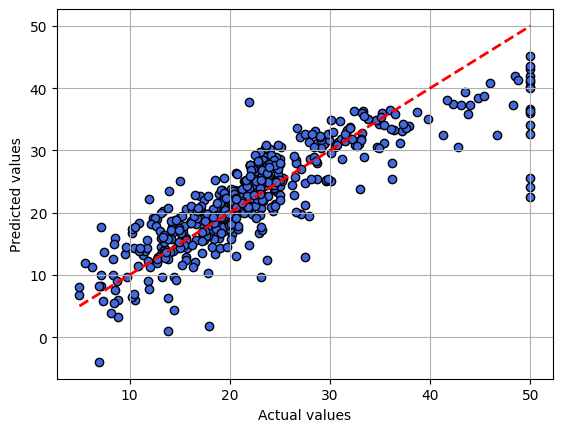

In [27]:
plt.scatter(y, y_lin_reg, color='royalblue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()

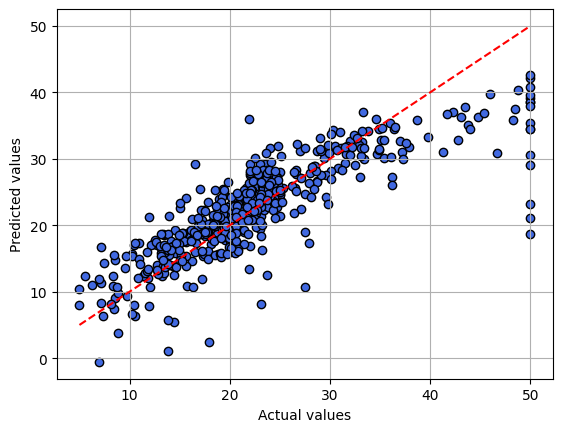

In [41]:
plt.scatter(y, y_gra_desc, color='royalblue', edgecolor='k')    #plots the predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') #gives the ideal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()